In [1]:
# Importing the required packages here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import SCORERS
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

## <font color='#eb3483'> 1. Loading and inspect your data </font>

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [6]:
df.apply('nunique')

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## <font color='#eb3483'> 2. Cleaning the Data </font>

### <font color='#eb3483'> 2.1 Check for duplicates </font>

In [7]:
print(df.shape)

duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(284807, 31)
(1081, 31)


#### <font> Note: Duplicates are found, and should be removed

In [8]:
df = df.drop_duplicates(keep='first')

print(df.shape)

(283726, 31)


### <font color='#eb3483'> 2.2 Check Data types </font>

In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### <font color='#eb3483'> 2.3 Missing Values </font>

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### <font> No missing values

### <font color='#eb3483'> 2.4 Visualization </font>

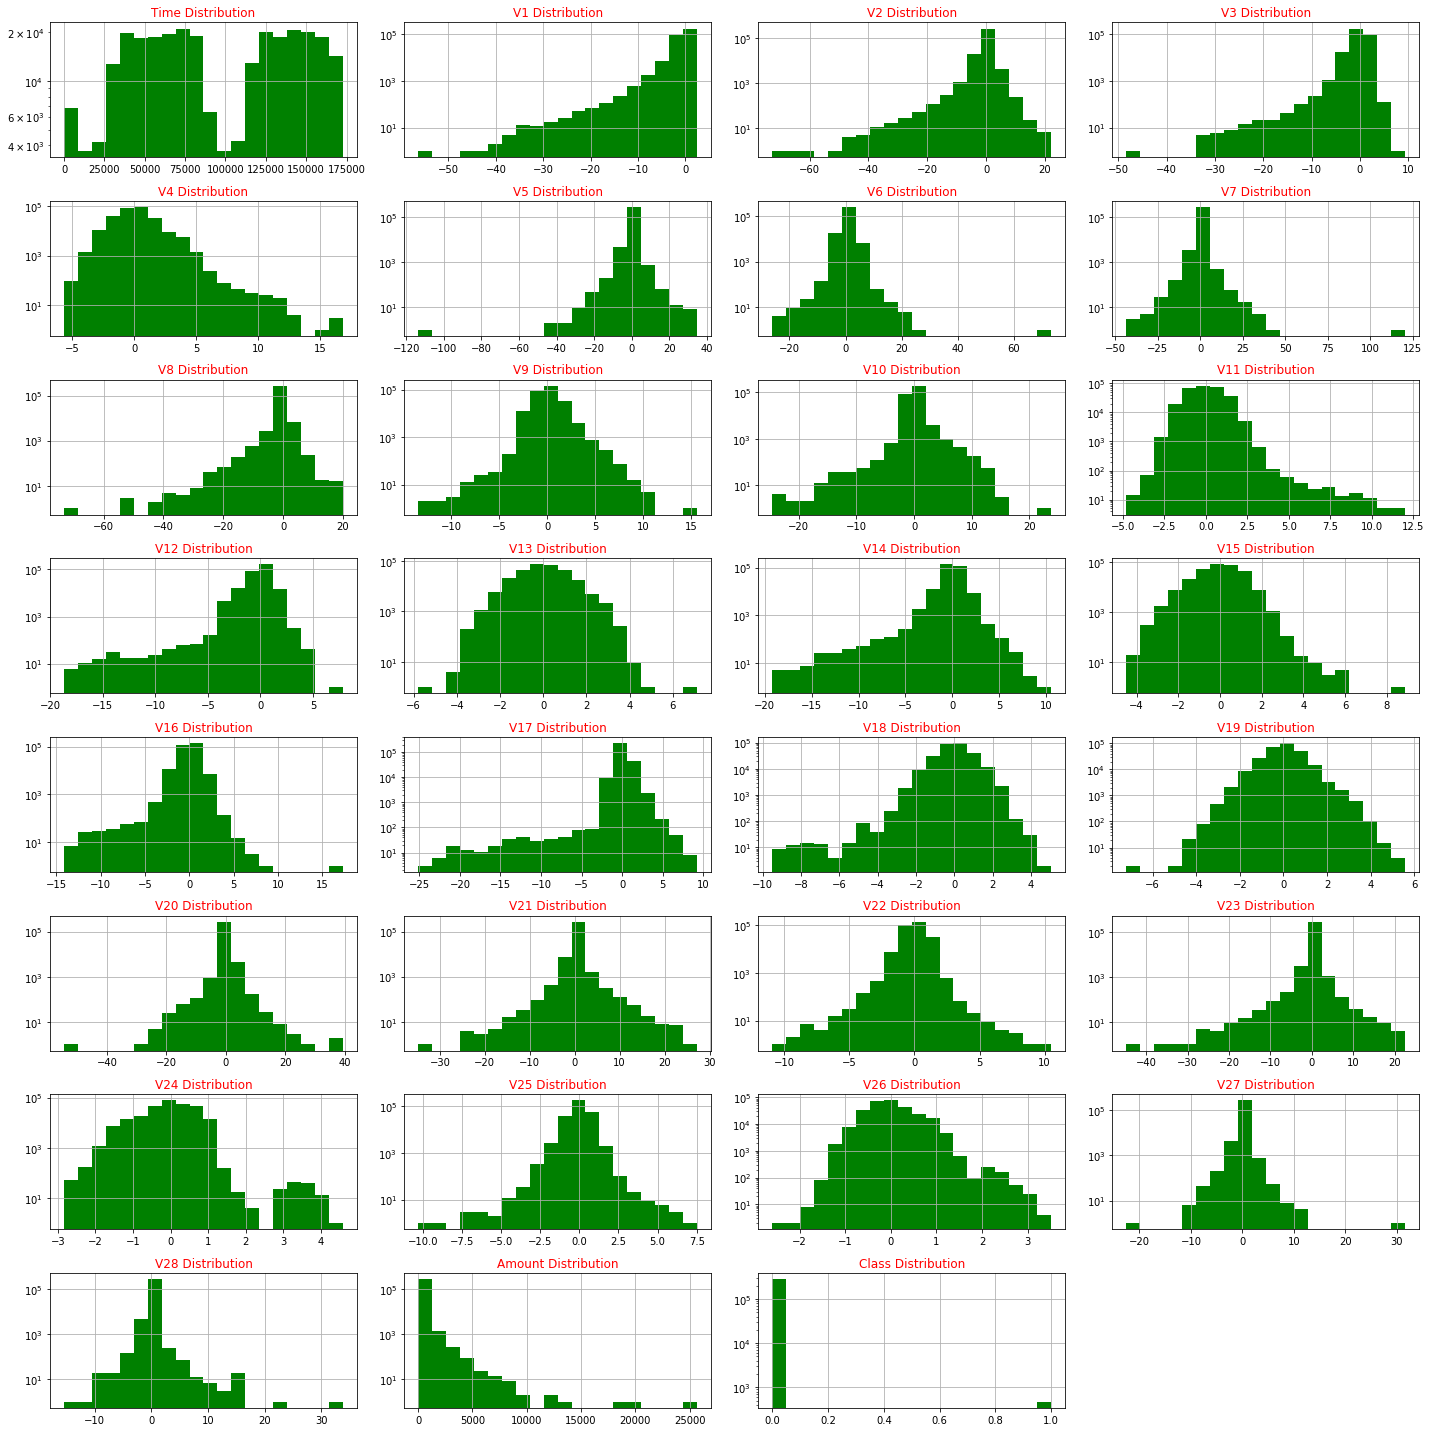

In [11]:
def histograms_plot(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')
        ax.set_yscale('log')

    fig.tight_layout()  
    plt.show()
histograms_plot(df, df.columns, 8, 4)

#### <font> Lets take a closer look at Time and Amount Distributions

In [12]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,283726.000,283726.000
mean,94811.078,88.473
std,47481.048,250.399
min,0.000,0.000
25%,54204.750,5.600
50%,84692.500,22.000
75%,139298.000,77.510
max,172792.000,25691.160


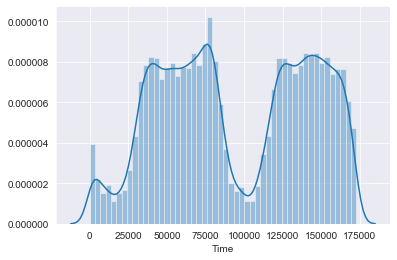

In [13]:
#visualize time
sns.set_style('darkgrid')
sns.distplot(df.Time)


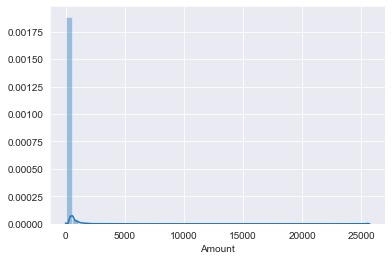

In [14]:
#visualize amount
sns.set_style('darkgrid')
sns.distplot(df.Amount)

From the summary table and the two graphs, we can sese that the biggest transaction was around 25691.20. The mean transaction of all credit cards was around 88.50

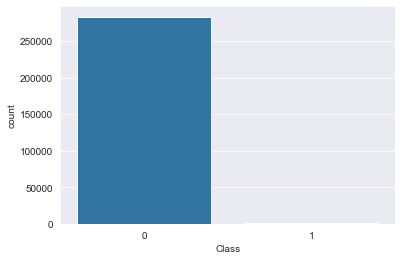

In [15]:
#Lets look at class for fraudulent and non-fradulent transactions
sns.countplot(x='Class', data = df)

The graph does not give us a great visualization... Let's try a summary table for precise data.

In [16]:
#Lets look at class for fraudulent and non-fradulent transactions
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

Okay, now we can see that in the dataset there were a record of 283253 with no frauds, and a record of 473 with frauds 

### <font color='#eb3483'> 2.5 Correlation </font>

In [17]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.179e-01,-1.056e-02,-4.221e-01,-1.058e-01,1.732e-01,-6.328e-02,8.534e-02,-3.820e-02,-7.861e-03,...,4.591e-02,1.437e-01,5.147e-02,-1.595e-02,-2.333e-01,-4.182e-02,-5.171e-03,-9.305e-03,-1.056e-02,-0.012
V1,0.118,1.000e+00,6.875e-03,-8.112e-03,2.257e-03,-7.036e-03,4.128e-04,-9.173e-03,-1.168e-03,1.828e-03,...,2.818e-03,-1.436e-03,-1.330e-03,-7.230e-04,-2.225e-04,-6.837e-04,-1.571e-02,-4.861e-03,-2.301e-01,-0.094
V2,-0.011,6.875e-03,1.000e+00,5.278e-03,-1.495e-03,5.210e-03,-5.944e-04,7.425e-03,2.899e-03,-2.740e-04,...,-4.897e-03,1.237e-03,-3.855e-03,7.006e-04,-1.569e-03,2.532e-04,7.555e-03,1.611e-03,-5.334e-01,0.085
V3,-0.422,-8.112e-03,5.278e-03,1.000e+00,2.829e-03,-6.879e-03,-1.511e-03,-1.172e-02,-1.815e-03,-3.579e-03,...,3.500e-03,-2.747e-04,4.491e-04,-7.219e-05,4.251e-04,-9.431e-05,-7.051e-03,-1.342e-04,-2.124e-01,-0.182
V4,-0.106,2.257e-03,-1.495e-03,2.829e-03,1.000e+00,1.744e-03,-8.804e-04,4.657e-03,8.905e-04,2.154e-03,...,-1.034e-03,1.154e-04,7.321e-04,-1.199e-04,1.617e-04,7.770e-04,1.322e-03,2.311e-04,9.951e-02,0.129
V5,0.173,-7.036e-03,5.210e-03,-6.879e-03,1.744e-03,1.000e+00,-9.375e-04,-8.709e-03,1.430e-03,-1.213e-03,...,1.622e-03,-5.587e-04,1.183e-03,1.979e-04,6.905e-05,3.904e-04,-5.798e-03,-8.201e-04,-3.877e-01,-0.088
V6,-0.063,4.128e-04,-5.944e-04,-1.511e-03,-8.804e-04,-9.375e-04,1.000e+00,4.363e-04,3.036e-03,-7.339e-04,...,-2.134e-03,1.104e-03,-7.554e-04,1.202e-03,6.970e-04,-2.804e-05,2.892e-04,9.246e-04,2.164e-01,-0.044
V7,0.085,-9.173e-03,7.425e-03,-1.172e-02,4.657e-03,-8.709e-03,4.363e-04,1.000e+00,-6.419e-03,-4.921e-03,...,9.010e-03,-2.280e-03,3.303e-03,-3.844e-04,-7.247e-05,6.239e-04,-4.537e-03,1.657e-03,4.004e-01,-0.172
V8,-0.038,-1.168e-03,2.899e-03,-1.815e-03,8.905e-04,1.430e-03,3.036e-03,-6.419e-03,1.000e+00,1.038e-03,...,1.889e-02,-6.156e-03,4.994e-03,1.125e-04,1.062e-05,-1.407e-03,6.133e-04,-9.929e-05,-1.047e-01,0.033
V9,-0.008,1.828e-03,-2.740e-04,-3.579e-03,2.154e-03,-1.213e-03,-7.339e-04,-4.921e-03,1.038e-03,1.000e+00,...,6.788e-04,7.846e-04,6.769e-04,-1.031e-04,-2.752e-04,1.253e-03,8.221e-03,5.591e-03,-4.412e-02,-0.094


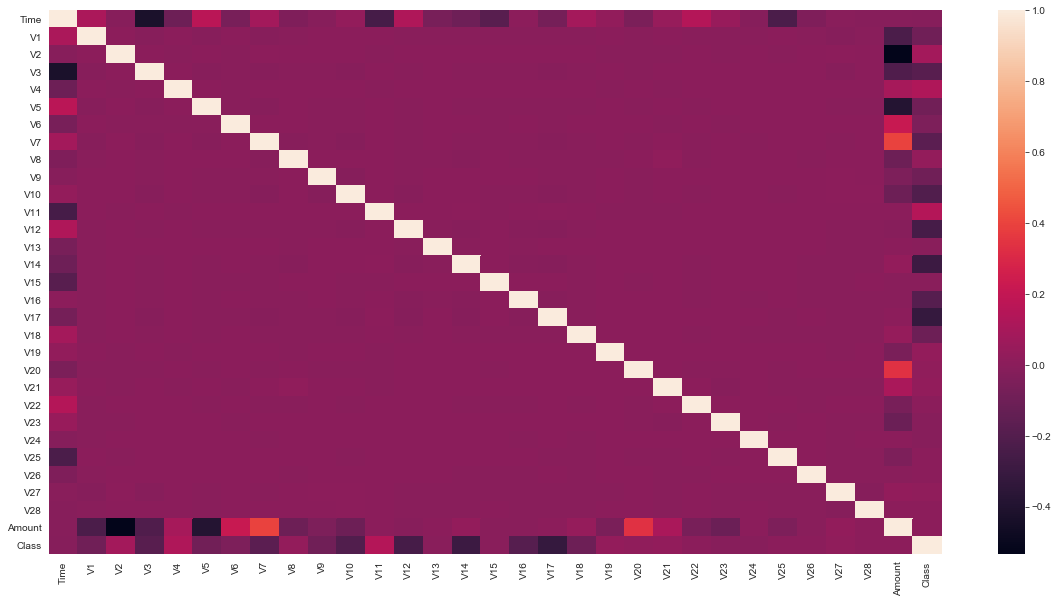

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=corr)

Note: the heatmap shows the variables that have high collinearity with the target variable

Moving Forward...
We cannot train the model onto the original dataset, as the predictive model would lead to massive or errors, such as the data is skewed, and it will be overfitting.

## <font color='#eb3483'> 3. Preparing Dataset for modelling </font>

### <font color='#eb3483'> 3.1 Skewness </font>

In [19]:
skew = df.skew()
skew

Time      -0.036
V1        -3.273
V2        -4.695
V3        -2.152
V4         0.672
V5        -2.414
V6         1.830
V7         2.890
V8        -8.311
V9         0.538
V10        1.253
V11        0.344
V12       -2.199
V13        0.064
V14       -1.919
V15       -0.310
V16       -1.051
V17       -3.690
V18       -0.249
V19        0.108
V20       -2.043
V21        2.820
V22       -0.182
V23       -5.867
V24       -0.552
V25       -0.416
V26        0.580
V27       -0.754
V28       11.555
Amount    16.979
Class     24.431
dtype: float64

### <font color='#eb3483'> 3.2 Scalling Amount and Time </font>

In [20]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()

#scaling time
scaled_time = scaler1.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

#scaling amount
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [21]:
#replacing the old time and amount with the newly scaled columns
df.drop(['Time', 'Amount'], axis = 1, inplace = True)

df = pd.concat([df, scaled_time.rename('scaled_time'), scaled_amount.rename('scaled_amount')], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0.0,-1.997,0.244
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0.0,-1.997,-0.343
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0.0,-1.997,1.159
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0.0,-1.997,0.140
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0.0,-1.997,-0.074


In [22]:
df = df.sample(frac = 1)

fraud_data = df.loc[df['Class'] == 1]
nfraud_data = df.loc[df['Class'] == 0][:462]

normal_distributed_df = pd.concat([fraud_data, nfraud_data])

# Shuffle dataframe rows
ndata = normal_distributed_df.sample(frac = 1, random_state = 42)

ndata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
58761,1.244,0.525,-0.539,1.209,0.480,-0.197,0.049,0.038,0.128,-0.553,...,-0.084,-0.193,-0.917,0.682,-0.194,0.046,0.040,1.0,-0.972,0.270
46918,-4.424,1.648,-6.934,4.895,-5.078,0.011,-3.409,1.409,-3.261,-7.781,...,0.487,1.229,-0.535,0.388,-0.009,2.300,0.081,1.0,-1.089,-0.293
69980,-1.739,1.345,-0.534,3.195,-0.416,-1.262,-2.341,0.713,-1.416,-2.997,...,-0.214,-0.337,0.237,0.246,-0.044,0.511,0.221,1.0,-0.864,-0.296
65121,-1.037,0.095,2.171,-0.442,0.397,1.273,-0.288,0.624,0.349,-0.887,...,1.281,0.006,-0.559,-0.784,0.446,0.089,0.148,0.0,-0.911,-0.307
95907,0.457,-0.879,0.218,1.401,-0.628,-0.059,0.337,0.038,-0.237,0.026,...,-0.151,-0.256,0.205,0.229,-0.484,-0.032,0.075,0.0,-0.613,-0.007


## <font color='#eb3483'> 4. Modelling </font>

### <font color='#eb3483'> 4.1 Split data for testing </font>

In [23]:
data = pd.DataFrame(data = ndata)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
58761,1.244,0.525,-0.539,1.209,0.480,-0.197,0.049,0.038,0.128,-0.553,...,-0.084,-0.193,-0.917,0.682,-0.194,0.046,0.040,1.0,-0.972,0.270
46918,-4.424,1.648,-6.934,4.895,-5.078,0.011,-3.409,1.409,-3.261,-7.781,...,0.487,1.229,-0.535,0.388,-0.009,2.300,0.081,1.0,-1.089,-0.293
69980,-1.739,1.345,-0.534,3.195,-0.416,-1.262,-2.341,0.713,-1.416,-2.997,...,-0.214,-0.337,0.237,0.246,-0.044,0.511,0.221,1.0,-0.864,-0.296
65121,-1.037,0.095,2.171,-0.442,0.397,1.273,-0.288,0.624,0.349,-0.887,...,1.281,0.006,-0.559,-0.784,0.446,0.089,0.148,0.0,-0.911,-0.307
95907,0.457,-0.879,0.218,1.401,-0.628,-0.059,0.337,0.038,-0.237,0.026,...,-0.151,-0.256,0.205,0.229,-0.484,-0.032,0.075,0.0,-0.613,-0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33276,-7.924,-5.198,-3.000,4.421,2.272,-3.394,-5.283,0.132,0.658,-0.795,...,-0.600,-4.908,0.410,-1.168,0.521,1.937,-1.553,1.0,-1.213,-0.350
140786,-0.433,2.428,-3.996,4.871,-1.796,-0.587,-4.655,1.285,-2.744,-5.639,...,-0.409,-0.321,-0.804,0.963,0.200,1.095,0.541,1.0,-0.223,0.047
263863,0.427,-3.799,-1.430,0.037,-2.092,-0.546,0.310,-0.351,0.133,0.246,...,-1.042,-0.354,0.042,-0.828,-0.669,-0.163,0.112,0.0,1.407,0.094
57470,0.364,1.444,-2.221,2.037,-1.237,-1.728,-2.059,0.359,-1.393,-3.506,...,-0.132,-0.033,0.461,0.560,0.409,0.540,0.297,1.0,-0.985,0.110


In [24]:
target_variable = "Class"

X = data.iloc[:, ndata.columns != target_variable ] #feature variable
y = data.iloc[:, ndata.columns == target_variable] #target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

#training set
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
print(X_train.shape)
print(y_train.shape)

#testing set
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)
print(X_test.shape)
print(y_test.shape)

(701, 30)
(701, 1)
(234, 30)
(234, 1)


### <font color='#eb3483'> 4.2 Create and Train the model for Logistic Regression </font>

In [26]:
#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
#clf.fit(X_train, y_train.ravel())
clf_logistic = LogisticRegression()

In [27]:
clf_logistic.fit(X_train, y_train.ravel())

LogisticRegression()

In [28]:
clf_logistic.score(X_test, y_test)

0.9444444444444444

In [29]:
clf_logistic.predict(X_test)

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### <font color='#eb3483'> 4.3 Using Decision Tree Classifier </font>

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=0)

In [31]:
y_prediction = tree_clf.predict(X_test)

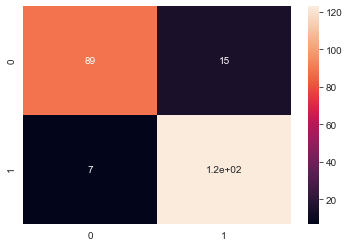

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
tree_cm = confusion_matrix(y_test,y_prediction)
sns.heatmap(tree_cm, annot=True)

In [33]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       104
         1.0       0.89      0.95      0.92       130

    accuracy                           0.91       234
   macro avg       0.91      0.90      0.90       234
weighted avg       0.91      0.91      0.91       234



In [34]:
tree_clf.score(X_test, y_test)

0.905982905982906

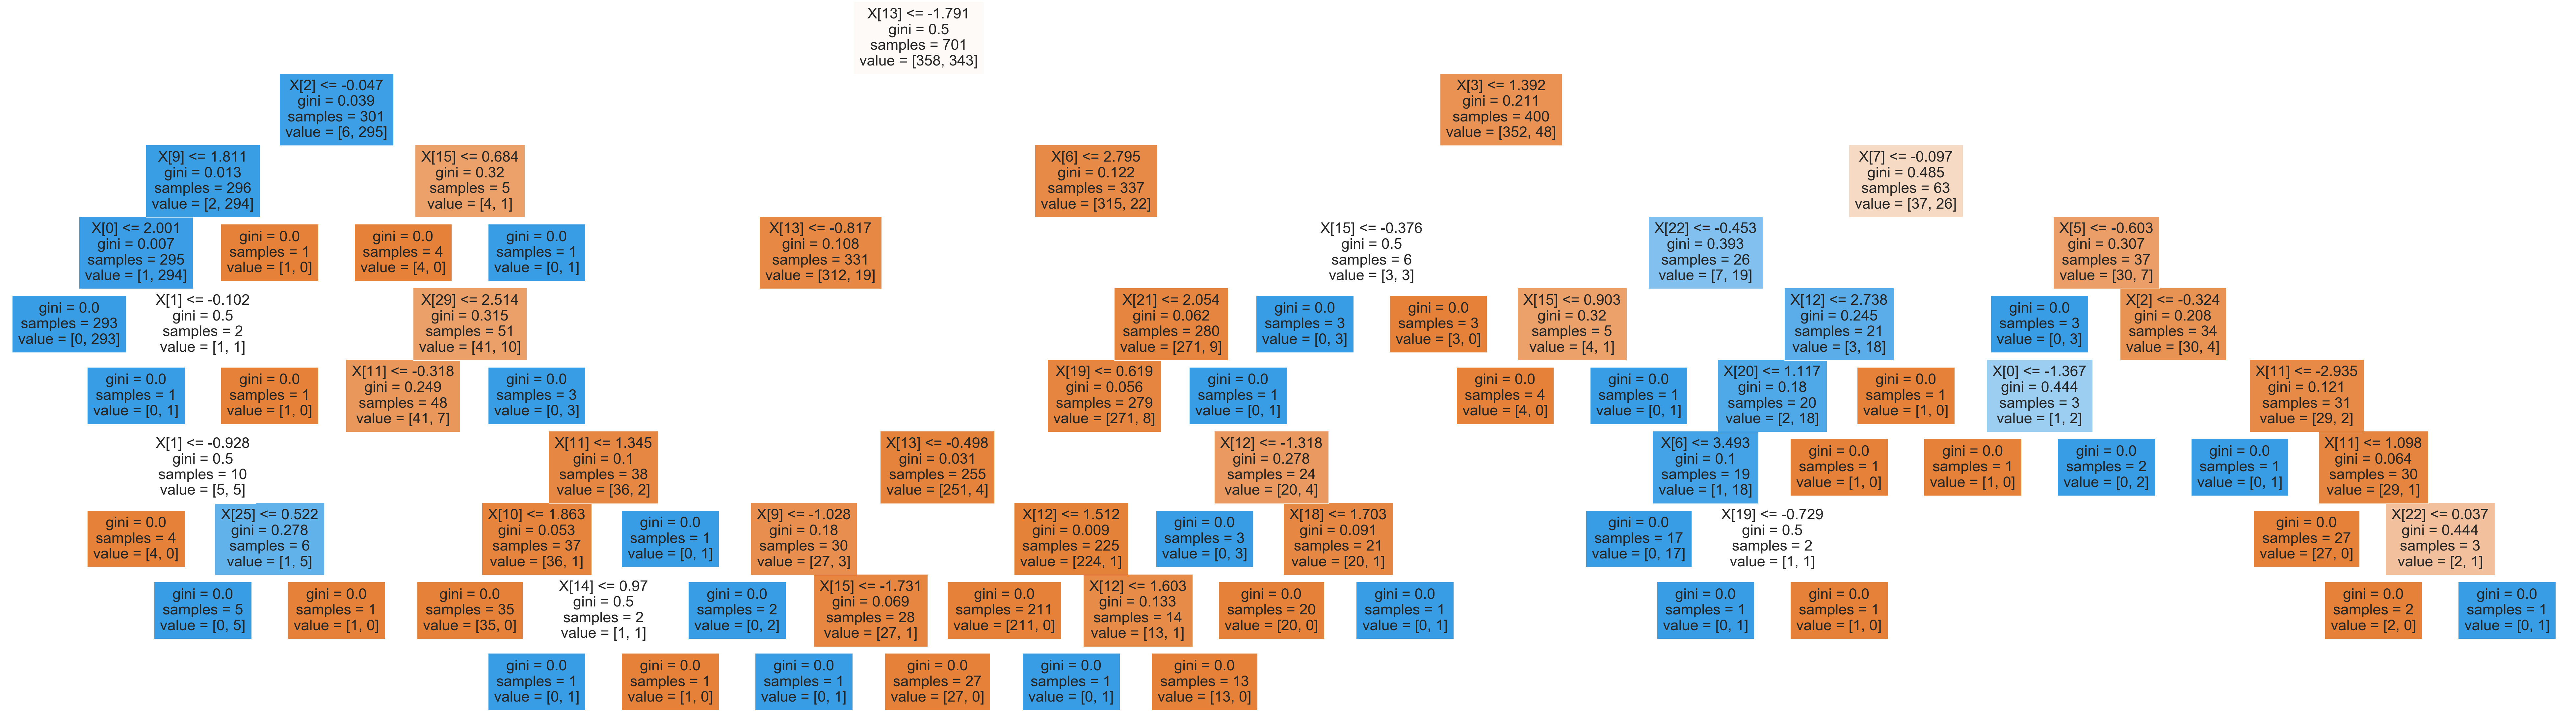

In [35]:
from sklearn import tree
fig = plt.figure(figsize=(140, 40))
t = tree.plot_tree(tree_clf, filled = True)

### <font color='#eb3483'> 4.4 Using Random Forest Classifier </font>

In [36]:
from sklearn.ensemble import RandomForestClassifier
rdm_clf =RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 0)
rdm_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [37]:
y_prediction = rdm_clf.predict(X_test)

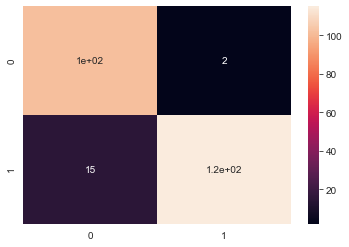

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
rdm_cm = confusion_matrix(y_test, y_prediction)
sns.heatmap(rdm_cm, annot=True)

In [39]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       104
         1.0       0.98      0.88      0.93       130

    accuracy                           0.93       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.93      0.93       234



In [40]:
rdm_clf.score(X_test, y_test)

0.9273504273504274

## <font color='#eb3483'> 5. Using PyCaret </font>

We can use PyCaret to quickly test a gaggle of machine learning algorithms and compare different models

In [41]:
conda install -c conda-forge lightgbm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd 
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
67305,1.389,-0.275,-0.071,-0.730,-0.607,-1.180,-0.068,-0.325,-1.551,0.830,...,0.702,-0.163,0.601,0.763,-0.118,-0.027,-0.004,0.0,-0.889,0.222
121760,1.265,-0.607,0.706,0.418,-0.534,1.181,-0.985,0.253,-0.269,0.583,...,-0.641,-0.097,-1.337,0.432,-0.281,0.112,0.032,0.0,-0.386,0.496
225962,-0.294,0.820,0.550,-0.888,0.796,-0.472,1.051,-0.026,-0.269,-0.747,...,-0.466,-0.171,-0.547,-0.217,-0.614,0.125,0.139,0.0,1.053,-0.344
196138,-0.948,0.951,2.522,3.161,1.333,1.437,0.502,-0.167,-1.138,1.345,...,0.697,-0.591,0.207,0.495,0.312,-0.518,-0.289,0.0,0.777,1.642
135896,1.146,-0.022,0.094,0.582,-0.268,-0.725,0.214,-0.211,0.067,-0.088,...,-0.719,-0.050,-0.108,0.351,0.196,-0.052,0.024,0.0,-0.276,0.892


Our dataset has 30 features about credit card transactions, and a Class of whether or not if it was a fraud (default variable). Our goal is to predict whetheror not a transaction was a fraud.

In [44]:
df = df.sample(frac = 0.95, random_state = 123)
test_data = df.drop(df.index).reset_index(drop = True)
df.reset_index(drop = True, inplace = True)

In [45]:
from pycaret.classification import *

In [46]:
creditfraud_clf = setup(data = df, target = 'Class', session_id = 123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(270565, 31)"
4,Missing Values,True
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### <font > compare models </font>

In [47]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9995,0.9476,0.7464,0.9278,0.8180,0.8178,0.8272,1.2143
1,Linear Discriminant Analysis,0.9994,0.9805,0.7589,0.8605,0.7990,0.7987,0.8040,0.2614
2,Extreme Gradient Boosting,0.9994,0.9858,0.7446,0.8968,0.7961,0.7958,0.8079,14.8047
3,CatBoost Classifier,0.9994,0.9854,0.7554,0.9046,0.8064,0.8061,0.8176,85.9015
4,K Neighbors Classifier,0.9993,0.9105,0.7089,0.8517,0.7648,0.7645,0.7722,0.1746
5,Random Forest Classifier,0.9993,0.9362,0.6821,0.8775,0.7503,0.7499,0.7645,0.7683
6,Ada Boost Classifier,0.9992,0.9736,0.6518,0.8369,0.7227,0.7224,0.7330,9.0425
7,Gradient Boosting Classifier,0.9991,0.8251,0.6429,0.8051,0.6928,0.6924,0.7074,44.0780
8,Logistic Regression,0.9990,0.9849,0.5714,0.7933,0.6459,0.6455,0.6634,0.3776
9,Decision Tree Classifier,0.9990,0.8524,0.7054,0.7219,0.6918,0.6913,0.7021,1.7687


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

### <font > Train a model </font>

In [48]:
xgb = create_model('xgboost') #Extreme Gradient Boosting

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9998,1.0000,0.7000,0.8235,0.8232,0.8364
1,0.9994,0.9990,0.5714,1.0000,0.7273,0.7270,0.7557
2,0.9989,0.9906,0.5000,0.8000,0.6154,0.6149,0.6320
3,0.9994,0.9664,0.8750,0.7778,0.8235,0.8232,0.8246
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9992,0.9411,0.6250,0.8333,0.7143,0.7139,0.7213
6,0.9998,1.0000,0.8750,1.0000,0.9333,0.9332,0.9353
7,0.9992,0.9936,0.5000,1.0000,0.6667,0.6663,0.7068
8,0.9994,0.9852,0.7500,0.8571,0.8000,0.7997,0.8015
9,0.9996,0.9818,0.7500,1.0000,0.8571,0.8569,0.8658


### <font > Lets train a tuned decistion tree model </font>

This will just test a simple grid of possible hyperparameter values and chose the one with best accuracy.

In [49]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9989,0.9281,0.8571,0.6000,0.7059,0.7054,0.7167
1,0.9992,0.7856,0.5714,0.8000,0.6667,0.6663,0.6757
2,0.9987,0.6874,0.3750,0.7500,0.5000,0.4994,0.5298
3,0.9987,0.8746,0.7500,0.6000,0.6667,0.6660,0.6702
4,0.9989,0.9995,1.0000,0.6154,0.7619,0.7614,0.7840
5,0.9989,0.8123,0.6250,0.7143,0.6667,0.6661,0.6676
6,0.9996,0.9998,1.0000,0.8000,0.8889,0.8887,0.8942
7,0.9994,0.8125,0.6250,1.0000,0.7692,0.7689,0.7903
8,0.9987,0.8122,0.6250,0.6250,0.6250,0.6244,0.6244
9,0.9989,0.8123,0.6250,0.7143,0.6667,0.6661,0.6676


In [50]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9997,0.8571,0.7500,0.8000,0.7997,0.8015
1,0.9994,0.7856,0.5714,1.0000,0.7273,0.7270,0.7557
2,0.9989,0.7499,0.5000,0.8000,0.6154,0.6149,0.6320
3,0.9989,0.8746,0.7500,0.6667,0.7059,0.7054,0.7066
4,0.9987,0.9996,0.5000,0.6667,0.5714,0.5708,0.5767
5,0.9992,0.8122,0.6250,0.8333,0.7143,0.7139,0.7213
6,0.9996,1.0000,0.8750,0.8750,0.8750,0.8748,0.8748
7,0.9992,0.8748,0.6250,0.8333,0.7143,0.7139,0.7213
8,0.9994,0.8748,0.7500,0.8571,0.8000,0.7997,0.8015
9,0.9994,0.8122,0.6250,1.0000,0.7692,0.7689,0.7903


### <font > Plot tuned_dt performance </font>

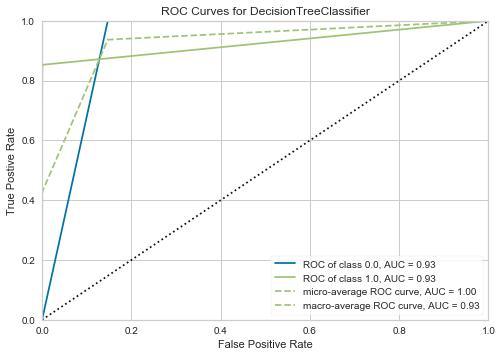

In [51]:
plot_model(tuned_dt, plot = 'auc')

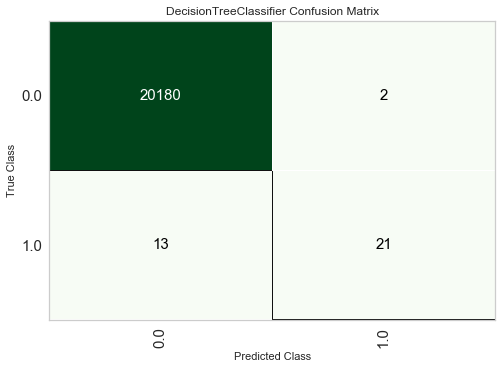

In [52]:
plot_model(tuned_dt, plot = 'confusion_matrix')

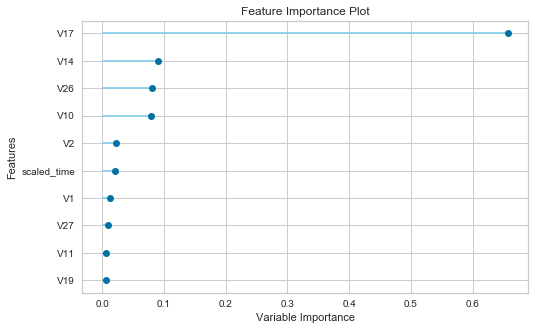

In [53]:
plot_model(tuned_dt, plot = 'feature')

In [54]:
evaluate_model(tuned_dt) #shows various visualizations depending on what we want to see

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…